In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()

print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

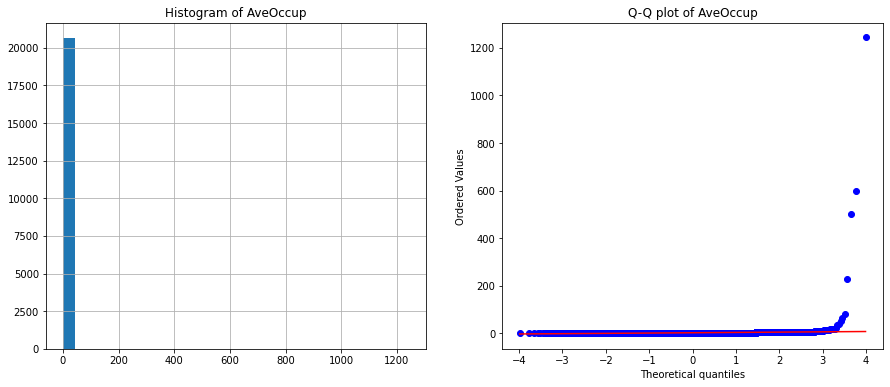

In [5]:
# Check function output

# AveOccup = average number of household members (number of people per household)
# AveOccup = number of members / number of houses

diagnostic_plots(X, "AveOccup")

# Reciprocal transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [7]:
# apply the reciprocal to a set of variables

X_tf["AveOccup"] = np.reciprocal(-X_tf["AveOccup"])

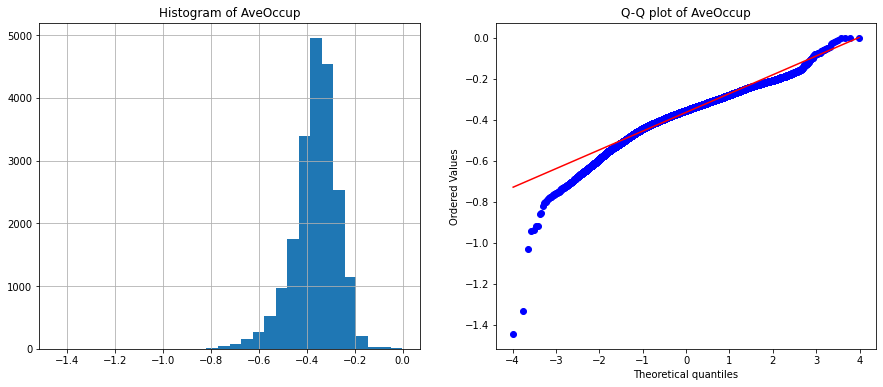

In [8]:
# use diagnostic plot function to corroborate variable transformation

# AveOccup = number of households per number of people)
# AveOccup = number of houses / number of people

diagnostic_plots(X_tf, "AveOccup")

# Reciprocal transformation with Scikit-learn

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [11]:
# start the transformer with NumPy reciprocal as parameter

transformer = FunctionTransformer(func=np.reciprocal)

In [12]:
# transform subset of dataframe

X_tf["AveOccup"] = transformer.transform(X["AveOccup"])

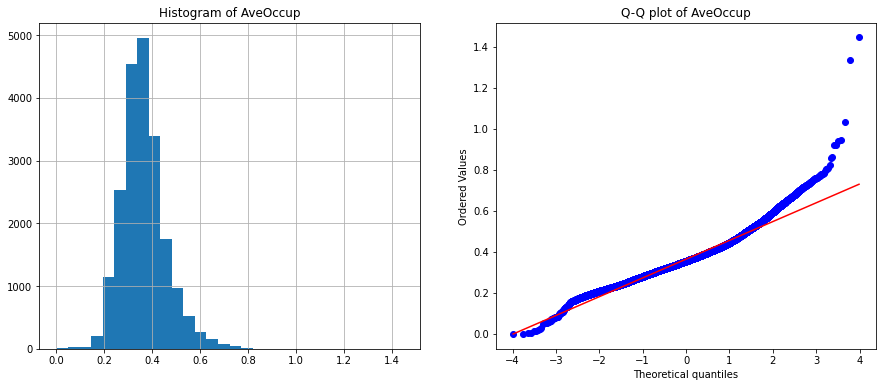

In [13]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "AveOccup")

# Reciprocal transformation with Feature-engine

In [14]:
from feature_engine.transformation import ReciprocalTransformer

In [15]:
# initialize the transformer with the varible that
# we want to modify

rt = ReciprocalTransformer(variables="AveOccup")

# fit transformer to the entire dataframe
rt.fit(X)

ReciprocalTransformer(variables='AveOccup')

In [16]:
# transform the selected variable in our data set

X_tf = rt.transform(X)

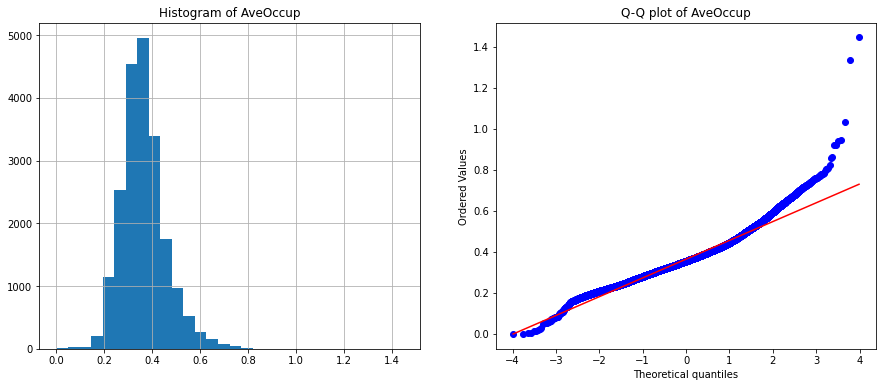

In [17]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "AveOccup")

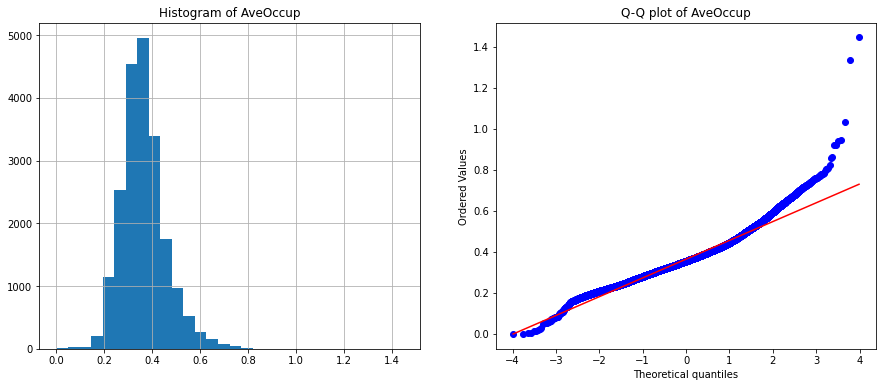

In [18]:
X_tf = rt.inverse_transform(X)

# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "AveOccup")